In [1]:
from data import load_data
import xarray
abs_path = "/proj/cvl/users/x_juska/repos/graphcast/"
nc_path =  abs_path +"data/22_3d_"

org_data = load_data(nc_path)
with open(abs_path + "data/source-era5_date-2022-01-01_res-0.25_levels-37_steps-01.nc", "rb") as f:
    ref_data = xarray.load_dataset(f)
# Select all time steps except the first one


Time to get surface data: 3.81 seconds
Time to get atmospheric data: 0.02 seconds


In [5]:
import numpy as np

def fix_axis(data):
    return data.reindex(lat=data['lat'][::-1], level=data['level'][::-1])

print(org_data.time)

<xarray.DataArray 'time' (time: 12)> Size: 96B
array([              0,  21600000000000,  43200000000000,  64800000000000,
        86400000000000, 108000000000000, 129600000000000, 151200000000000,
       172800000000000, 194400000000000, 216000000000000, 237600000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 96B 0 days 00:00:00 ... 2 days 18:00:00


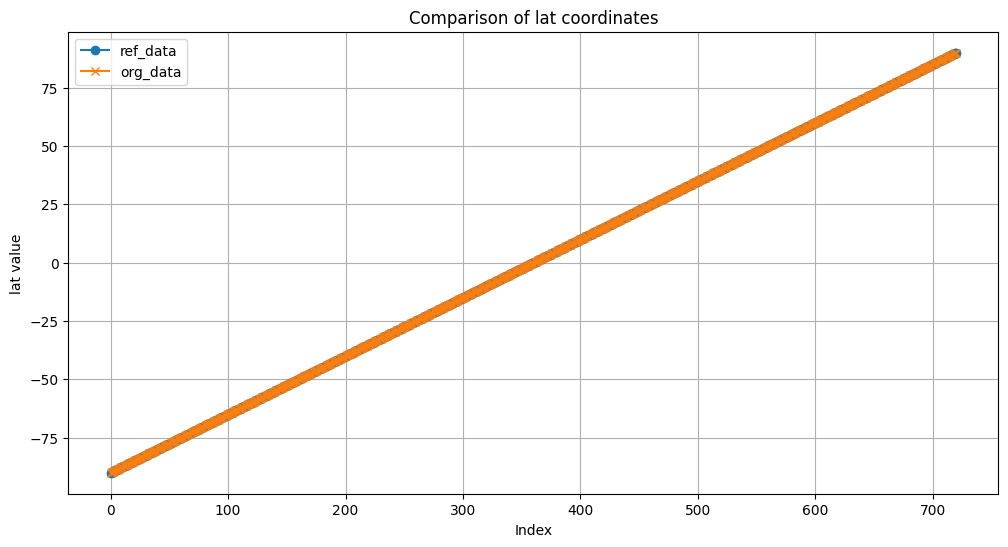

lat range:
ref_data: -90.0 to 90.0
org_data: -90.0 to 90.0



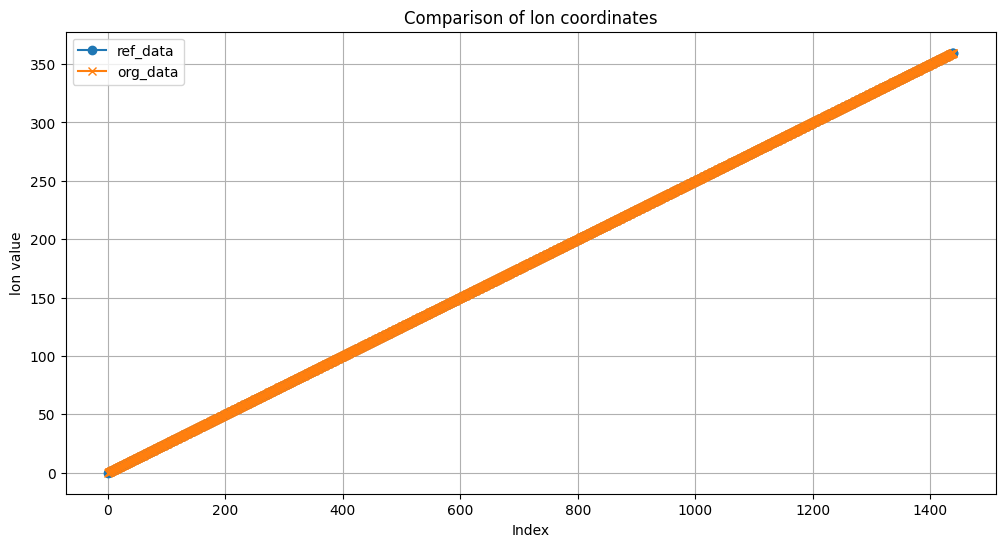

lon range:
ref_data: 0.0 to 359.75
org_data: 0.0 to 359.75



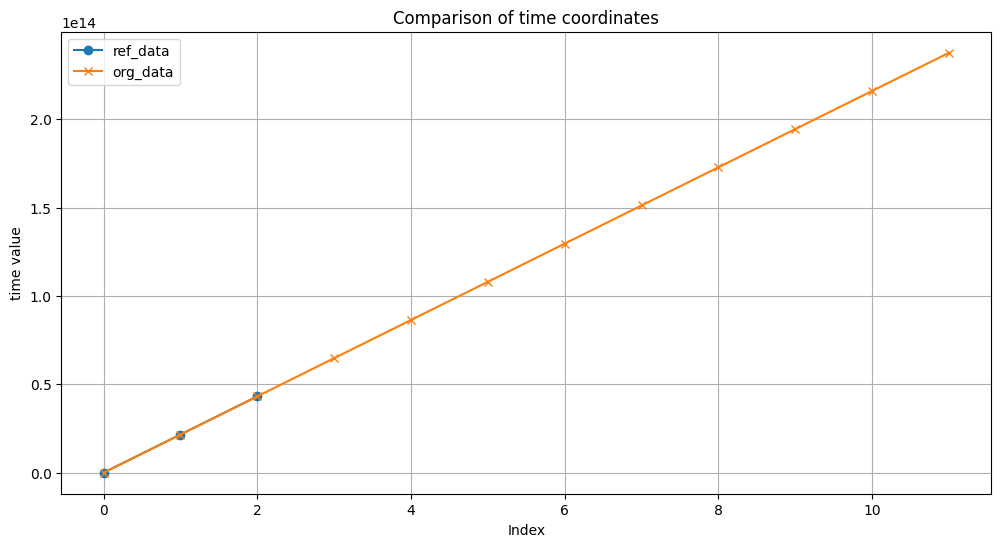

time range:
ref_data: 0 nanoseconds to 43200000000000 nanoseconds
org_data: 0 nanoseconds to 237600000000000 nanoseconds



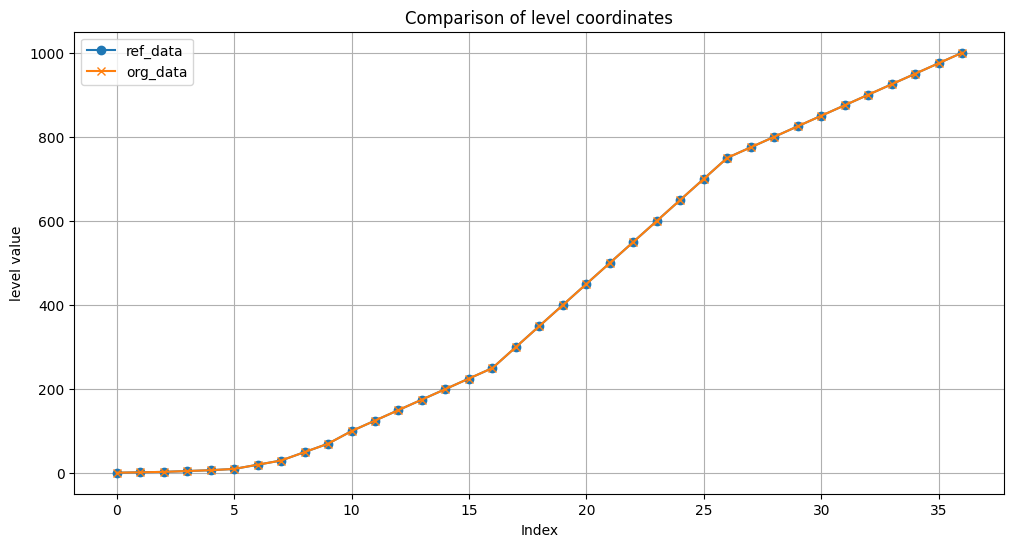

level range:
ref_data: 1 to 1000
org_data: 1.0 to 1000.0

Dataset shapes:
ref_data: FrozenMappingWarningOnValuesAccess({'lon': 1440, 'lat': 721, 'level': 37, 'time': 3, 'batch': 1})
org_data: FrozenMappingWarningOnValuesAccess({'time': 12, 'lat': 721, 'lon': 1440, 'level': 37, 'batch': 1})


In [3]:
import matplotlib.pyplot as plt

data = fix_axis(org_data)


In [16]:
data

<xarray.Dataset> Size: 11GB
Dimensions:                       (time: 12, lat: 721, lon: 1440, level: 37,
                                   batch: 1)
Coordinates:
  * time                          (time) timedelta64[ns] 96B 0 days 00:00:00 ...
  * lat                           (lat) float64 6kB -90.0 -89.75 ... 89.75 90.0
  * lon                           (lon) float64 12kB 0.0 0.25 ... 359.5 359.8
  * level                         (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    datetime                      (batch, time) datetime64[ns] 96B 2022-01-01...
Dimensions without coordinates: batch
Data variables: (12/14)
    10m_u_component_of_wind       (batch, time, lat, lon) float32 50MB nan .....
    10m_v_component_of_wind       (batch, time, lat, lon) float32 50MB nan .....
    2m_temperature                (batch, time, lat, lon) float32 50MB nan .....
    geopotential_at_surface       (batch, lat, lon) float32 4MB nan nan ... nan
    land_sea_mask                 (batch, lat, lon) float32 4MB nan nan ... nan
    mean_sea_level_pressure       (batch, time, lat, lon) float32 50MB nan .....
    ...                            ...
    u_component_of_wind           (batch, time, level, lat, lon) float32 2GB ...
    v_component_of_wind           (batch, time, level, lat, lon) float32 2GB ...
    geopotential                  (batch, time, level, lat, lon) float32 2GB ...
    specific_humidity             (batch, time, level, lat, lon) float32 2GB ...
    temperature                   (batch, time, level, lat, lon) float32 2GB ...
    vertical_velocity             (batch, time, level, lat, lon) float32 2GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-14T09:30 GRIB to CDM+CF via cfgrib-0.9.1...

: 

In [15]:
ref_data["10m_u_component_of_wind"].isel(time=0)

<xarray.DataArray '10m_u_component_of_wind' (batch: 1, lat: 721, lon: 1440)> Size: 4MB
array([[[ 1.3093542 ,  1.3093542 ,  1.3093542 , ...,  1.3093542 ,
          1.3093542 ,  1.3093542 ],
        [ 1.6173054 ,  1.6372317 ,  1.657158  , ...,  1.563867  ,
          1.581076  ,  1.6000966 ],
        [ 0.96245635,  0.9860054 ,  1.0195178 , ...,  0.8700708 ,
          0.9053947 ,  0.9361898 ],
        ...,
        [-2.6804256 , -2.6704626 , -2.6559706 , ..., -2.723901  ,
         -2.7057862 , -2.6922002 ],
        [-2.7202783 , -2.7121265 , -2.7021632 , ..., -2.7465446 ,
         -2.7383928 , -2.7293355 ],
        [ 0.06758618,  0.06758618,  0.06758618, ...,  0.06758618,
          0.06758618,  0.06758618]]], dtype=float32)
Coordinates:
  * lon       (lon) float32 6kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float32 3kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
    time      timedelta64[ns] 8B 00:00:00
    datetime  (batch) datetime64[ns] 8B 2022-01-01
Dimensions without coordinates: batch

In [ ]:
def plot_coord_comparison(ref_data, data, coord):
    plt.figure(figsize=(12, 6))
    plt.plot(ref_data[coord].values, label='ref_data', marker='o')
    plt.plot(data[coord].values, label='org_data', marker='x')
    plt.title(f'Comparison of {coord} coordinates')
    plt.xlabel('Index')
    plt.ylabel(f'{coord} value')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"{coord} range:")
    print(f"ref_data: {ref_data[coord].values.min()} to {ref_data[coord].values.max()}")
    print(f"org_data: {data[coord].values.min()} to {data[coord].values.max()}")
    print()

# Compare lat, lon, and time coordinates
for coord in ['lat', 'lon', 'time']:
    plot_coord_comparison(ref_data, data, coord)

# Compare level coordinate if it exists in both datasets
if 'level' in ref_data.coords and 'level' in data.coords:
    plot_coord_comparison(ref_data, data, 'level')
else:
    print("'level' coordinate not present in both datasets")

# Print the shapes of the datasets
print("Dataset shapes:")
print(f"ref_data: {ref_data.dims}")
print(f"org_data: {data.dims}")


Level 5 not available for 10m_u_component_of_wind
Level 5 not available for 10m_v_component_of_wind
Level 5 not available for 2m_temperature
Level 5 not available for geopotential_at_surface
Level 5 not available for land_sea_mask
Level 5 not available for mean_sea_level_pressure
Level 5 not available for toa_incident_solar_radiation
Level 5 not available for total_precipitation_6hr


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

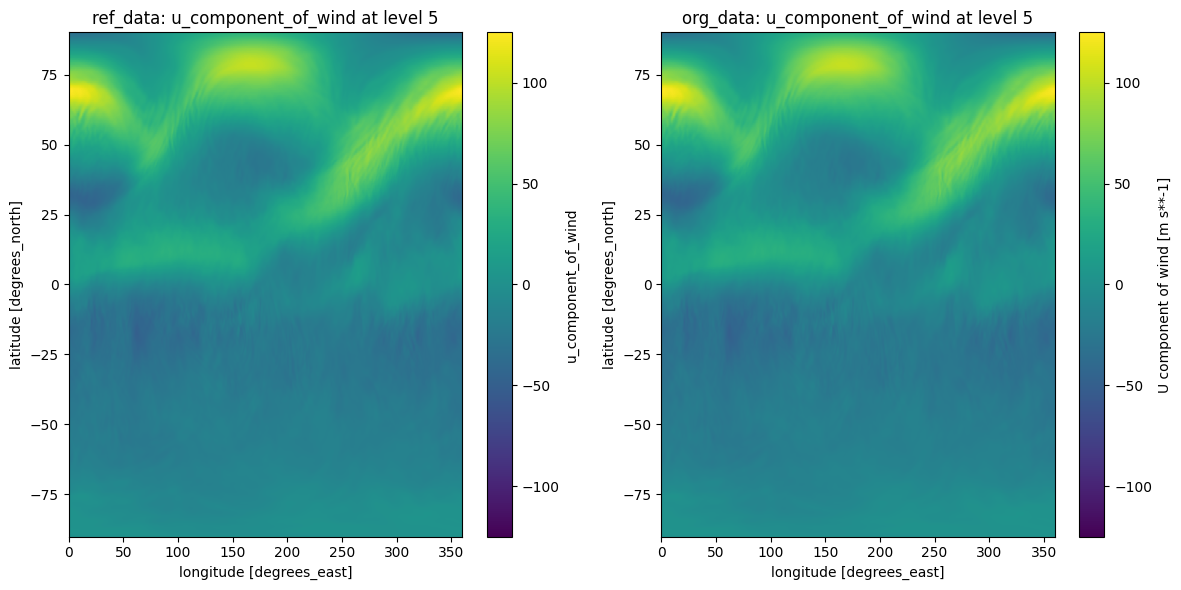

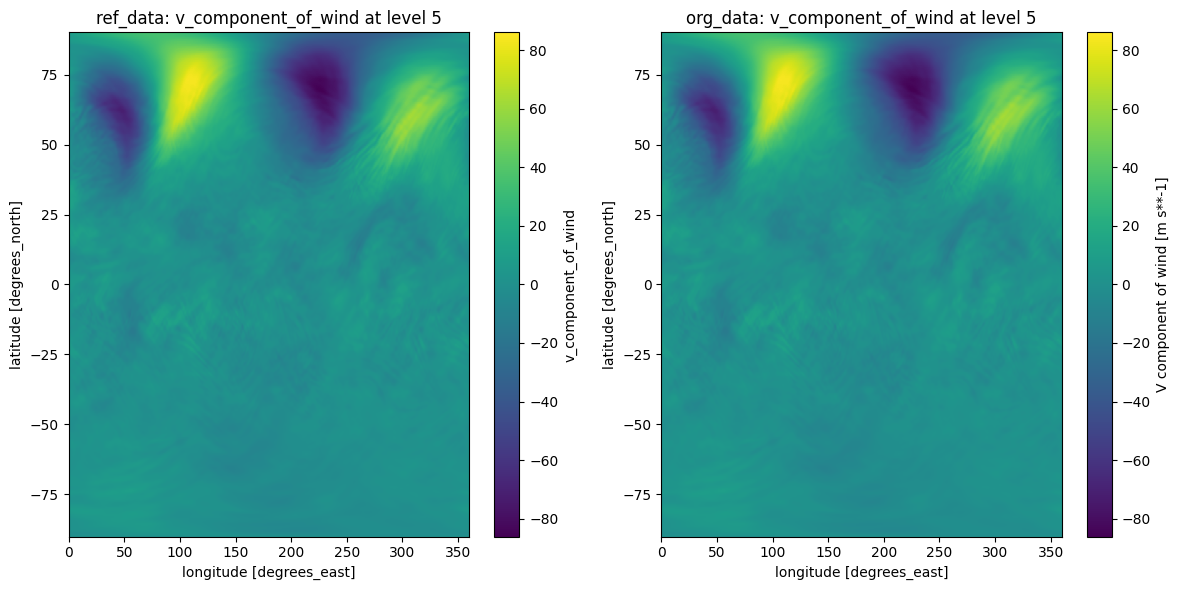

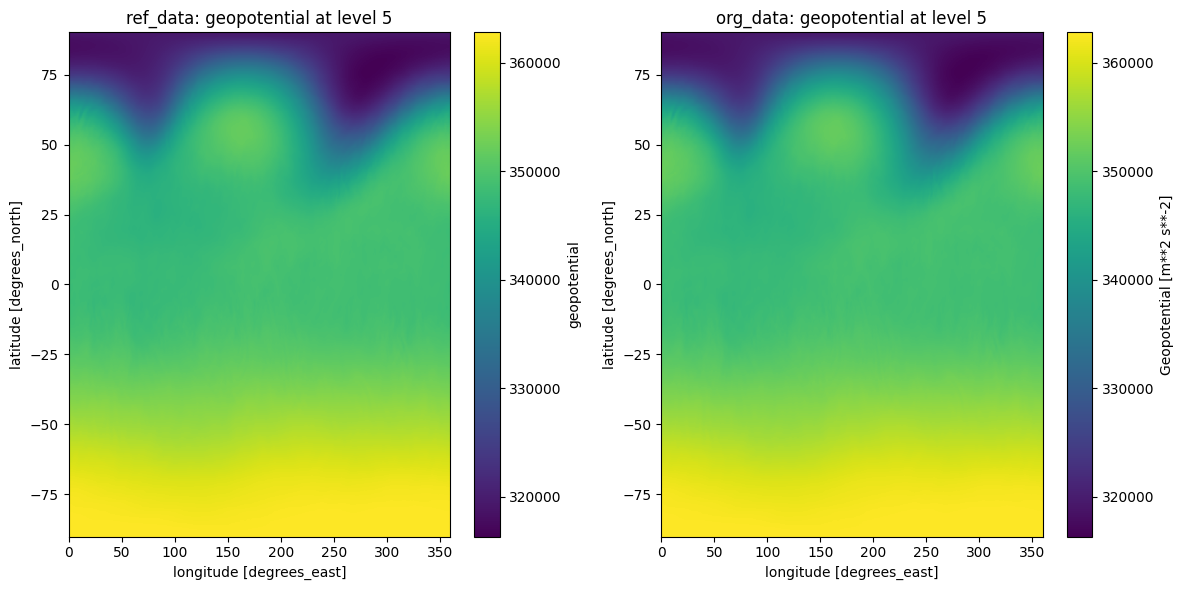

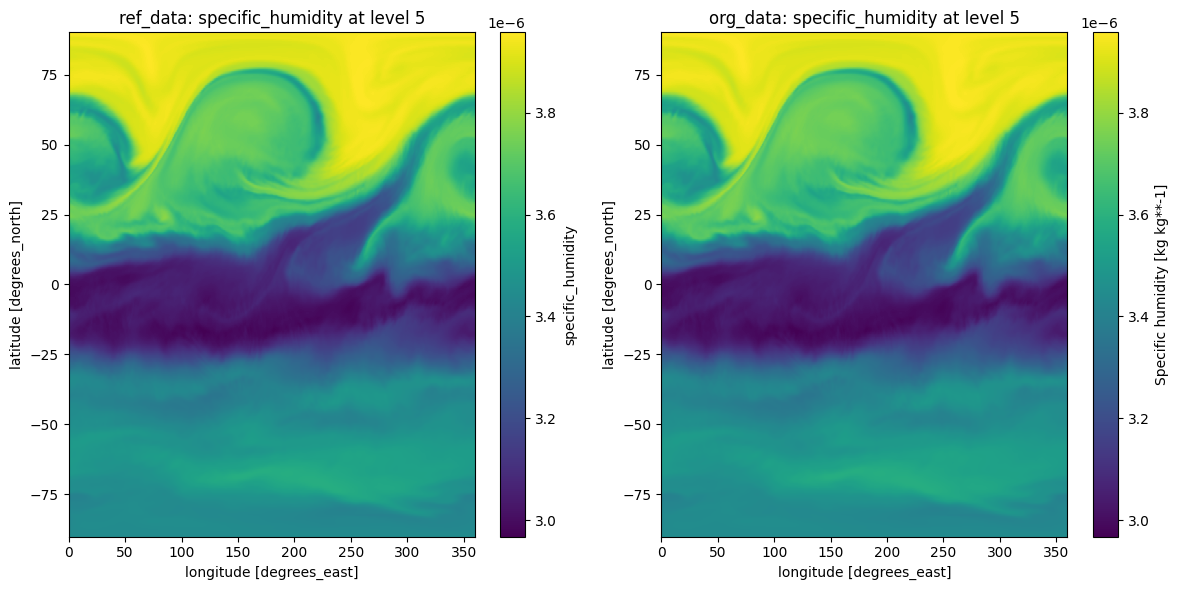

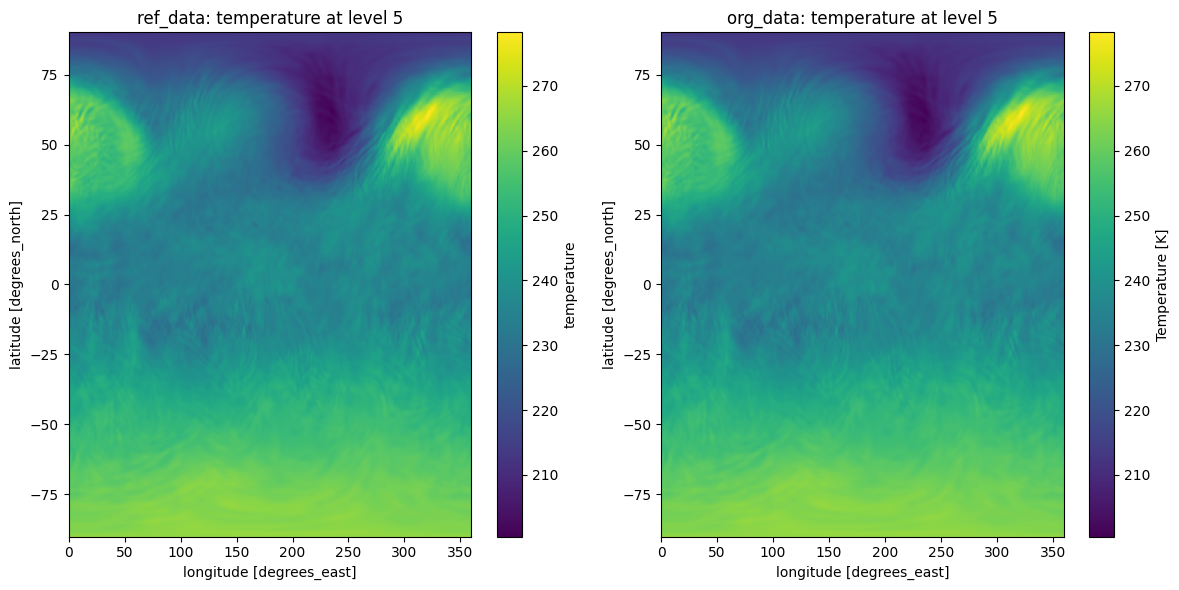

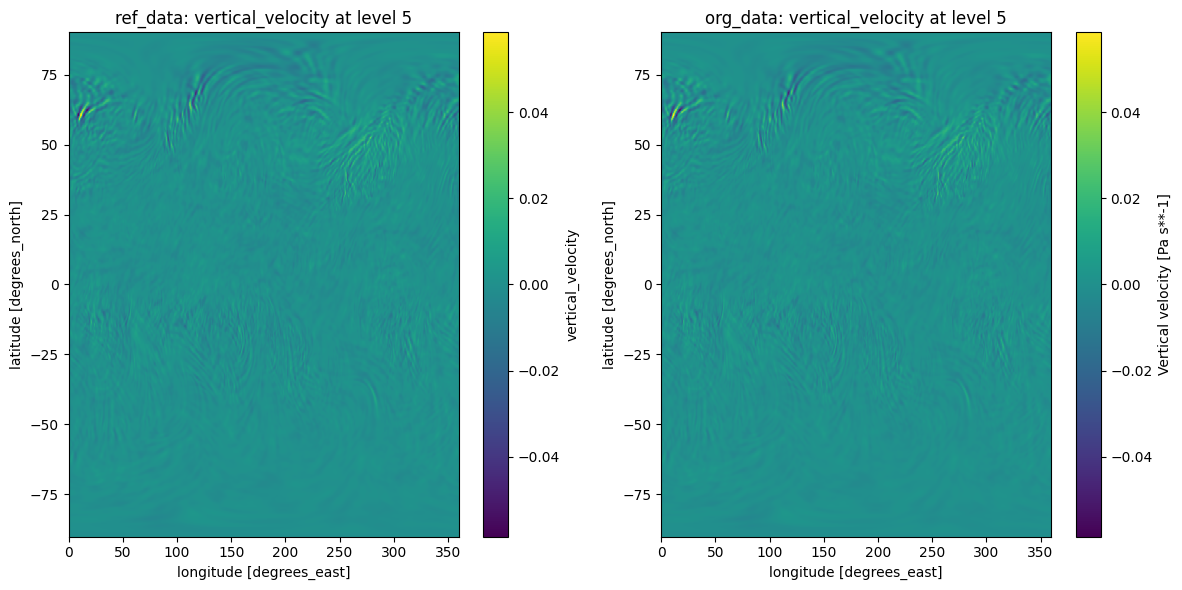

Level 1000 not available for 10m_u_component_of_wind
Level 1000 not available for 10m_v_component_of_wind
Level 1000 not available for 2m_temperature
Level 1000 not available for geopotential_at_surface
Level 1000 not available for land_sea_mask
Level 1000 not available for mean_sea_level_pressure
Level 1000 not available for toa_incident_solar_radiation
Level 1000 not available for total_precipitation_6hr


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

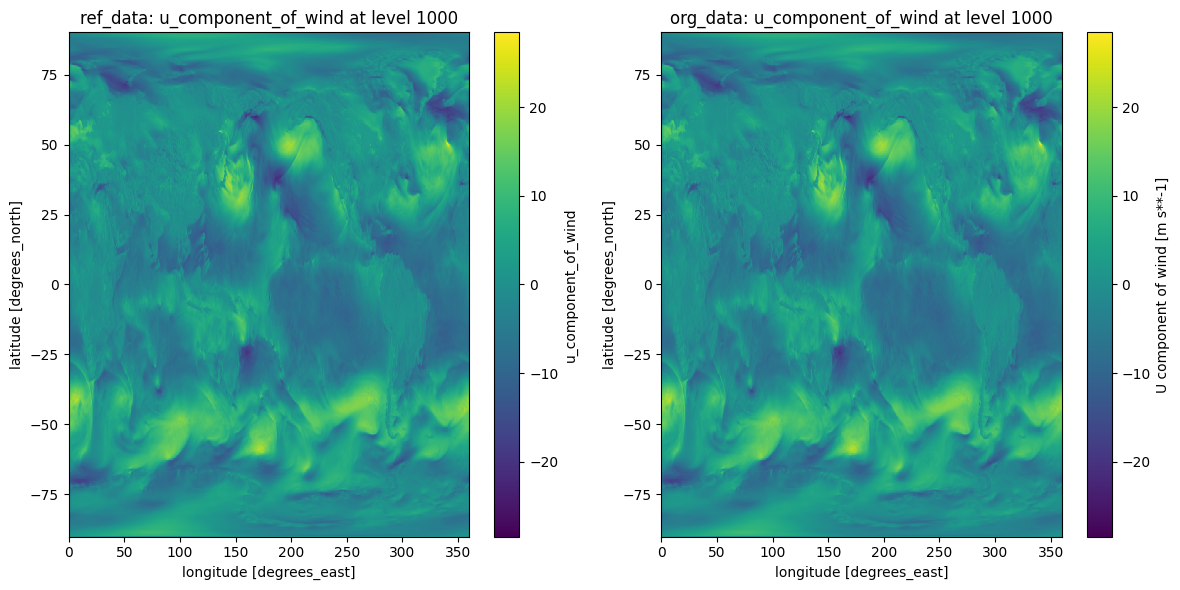

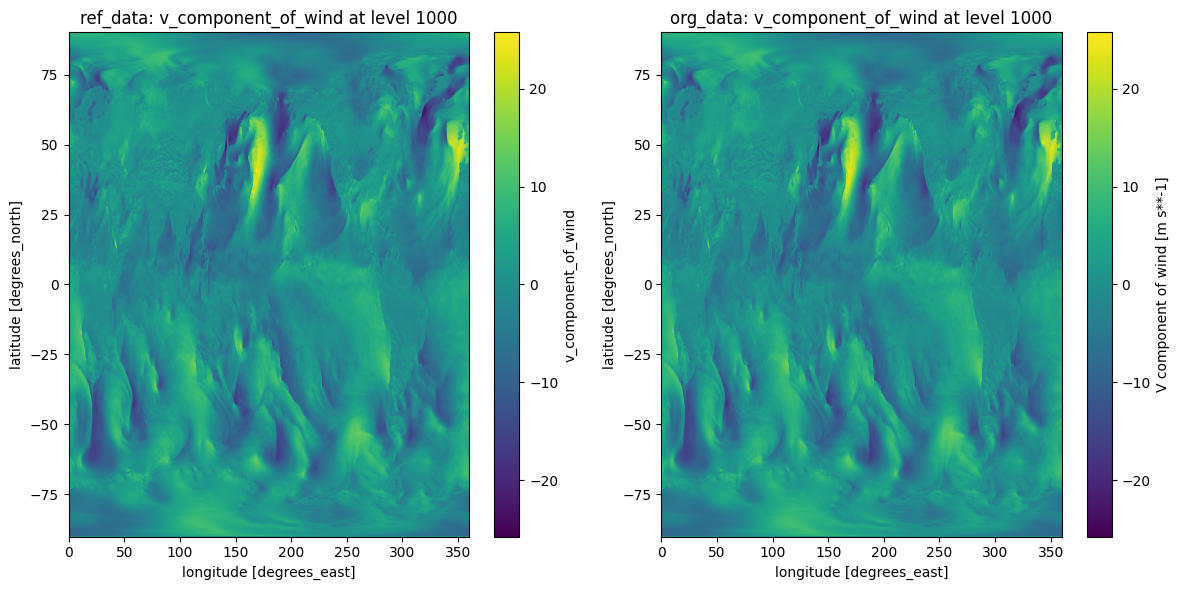

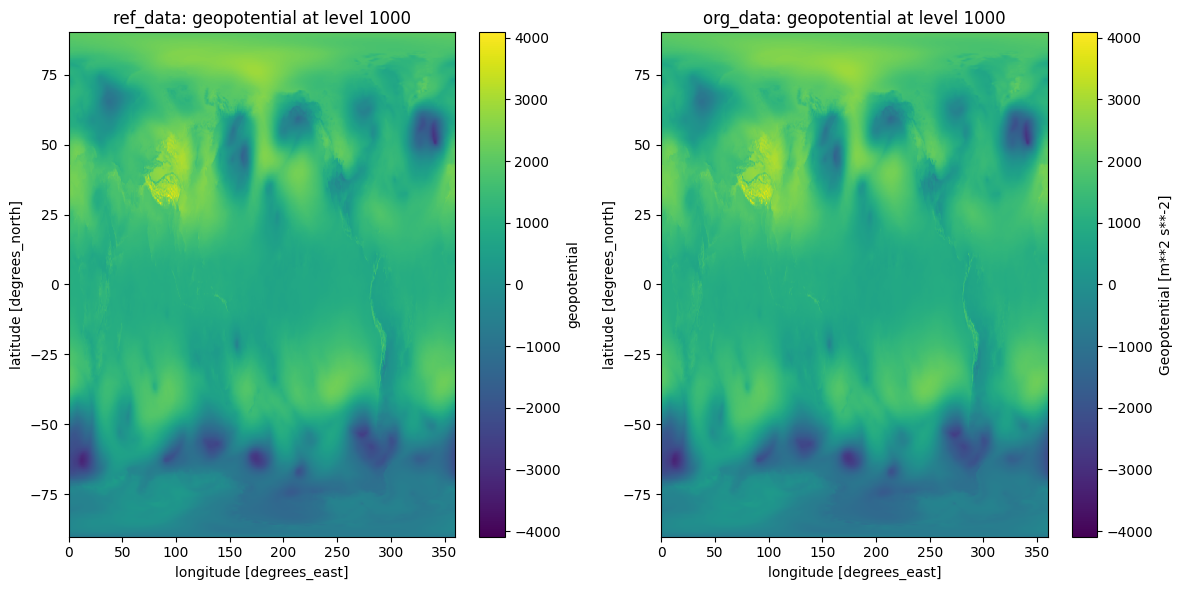

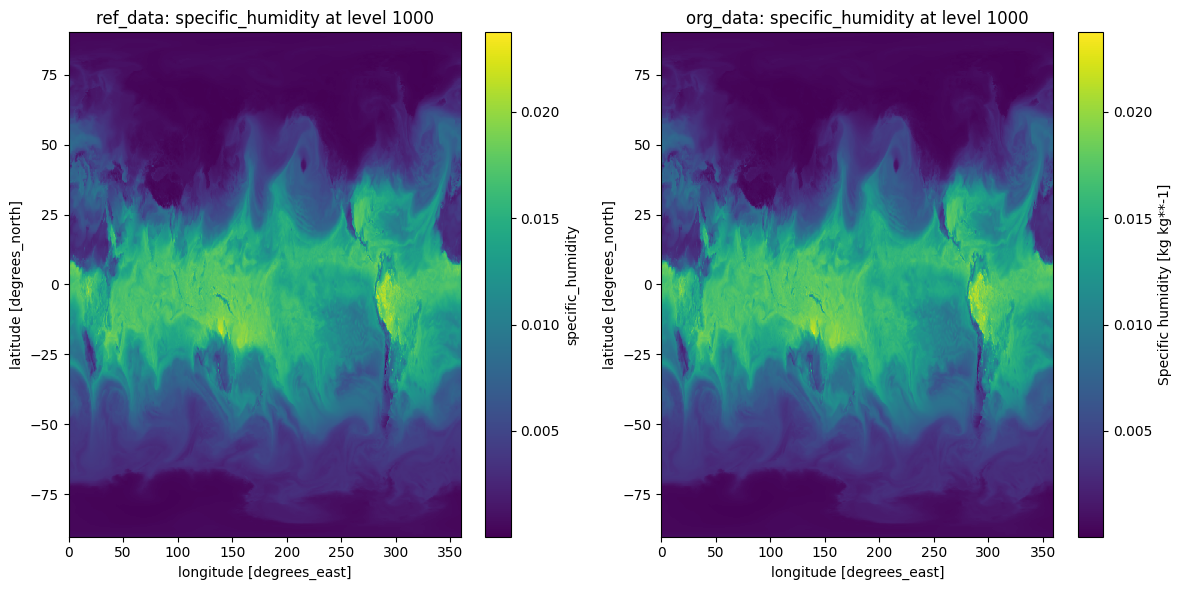

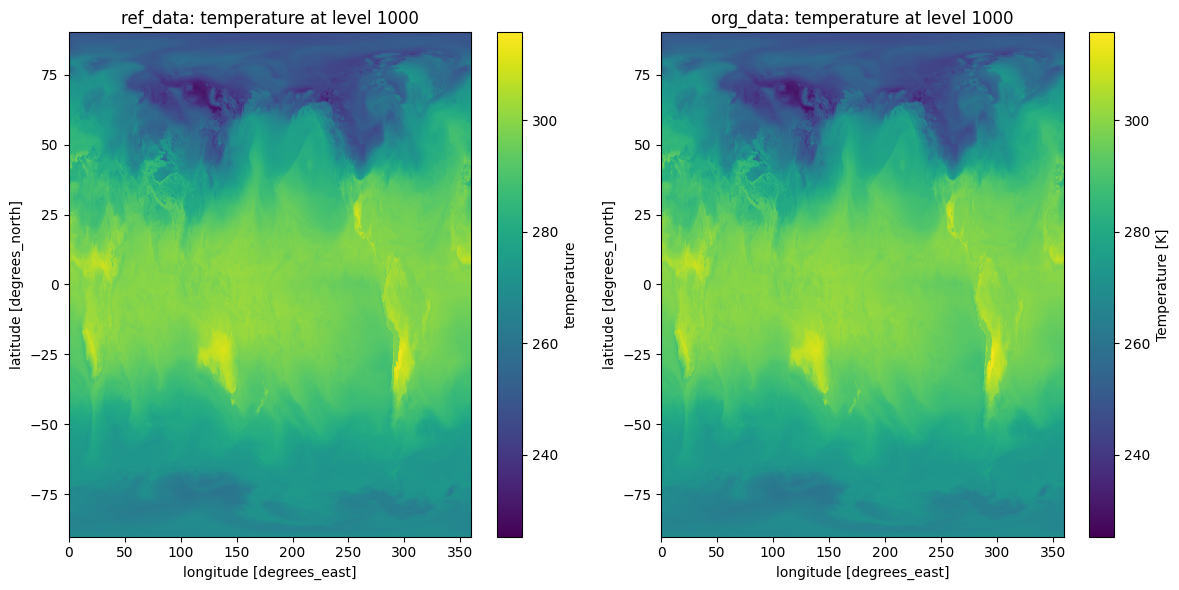

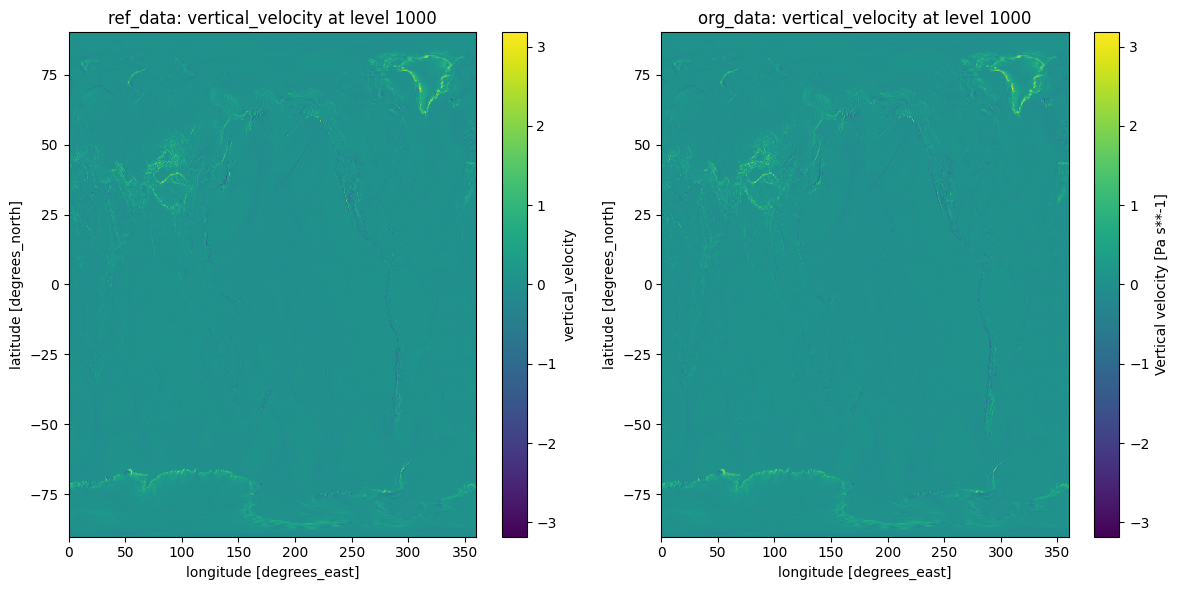


Summary statistics for level 5:
Level 5 not available for 10m_u_component_of_wind
Level 5 not available for 10m_v_component_of_wind
Level 5 not available for 2m_temperature
Level 5 not available for geopotential_at_surface
Level 5 not available for land_sea_mask
Level 5 not available for mean_sea_level_pressure
Level 5 not available for toa_incident_solar_radiation
Level 5 not available for total_precipitation_6hr

u_component_of_wind:
ref_data - min: -46.98, max: 115.97, mean: 1.08
org_data - min: -46.98, max: 115.97, mean: 1.08

v_component_of_wind:
ref_data - min: -93.92, max: 92.87, mean: -0.32
org_data - min: -93.92, max: 92.87, mean: -0.32

geopotential:
ref_data - min: 316272.88, max: 363001.09, mean: 347795.09
org_data - min: 316272.88, max: 363000.88, mean: 347795.12

specific_humidity:
ref_data - min: 0.00, max: 0.00, mean: 0.00
org_data - min: 0.00, max: 0.00, mean: 0.00

temperature:
ref_data - min: 201.04, max: 279.22, mean: 241.77
org_data - min: 201.04, max: 279.22, mea

In [7]:
# Function to plot variable comparison for a specific level
def plot_variable_comparison(ref_data, data, variable, level):
    plt.figure(figsize=(12, 6))
    
    # Extract data for the specified level
    ref_slice = ref_data[variable].sel(level=level).isel(time=0)
    data_slice = data[variable].sel(level=level).isel(time=0)
    
    # Create a 2D plot (assuming lat and lon dimensions)
    plt.subplot(121)
    ref_slice.plot(cmap='viridis')
    plt.title(f'ref_data: {variable} at level {level}')
    
    plt.subplot(122)
    data_slice.plot(cmap='viridis')
    plt.title(f'org_data: {variable} at level {level}')
    
    plt.tight_layout()
    plt.show()

# List of variables to plot
# variables = ['temperature', 'u_component_of_wind', 'v_component_of_wind', 'specific_humidity']
variables = list(data.data_vars)
# Plot comparisons for level 5 and 1000
for level in [5, 1000]:
    for var in variables:
        if var in ref_data and var in data:
            try:
                plot_variable_comparison(ref_data, data, var, level)
            except KeyError:
                print(f"Level {level} not available for {var}")
        else:
            print(f"Variable {var} not present in both datasets")

# Print summary statistics
time = 2
for level in [5, 1000]:
    print(f"\nSummary statistics for level {level}:")
    for var in variables:
        if var in ref_data and var in data:
            try:
                ref_slice = ref_data[var].sel(level=level).isel(time=time)
                data_slice = data[var].sel(level=level).isel(time=time)
                print(f"\n{var}:")
                print(f"ref_data - min: {ref_slice.min().values:.2f}, max: {ref_slice.max().values:.2f}, mean: {ref_slice.mean().values:.2f}")
                print(f"org_data - min: {data_slice.min().values:.2f}, max: {data_slice.max().values:.2f}, mean: {data_slice.mean().values:.2f}")
            except KeyError:
                print(f"Level {level} not available for {var}")
        else:
            print(f"Variable {var} not present in both datasets")
